# Potentiel de Sridhar & Touma

In [1]:
import numpy as N
import matplotlib.pyplot as P

%matplotlib inline

## Définition du potentiel et de ses dérivées

Voir [Sridhar & Touma (1999)](http://cdsads.u-strasbg.fr/abs/1999MNRAS.303..483S).

In [2]:
def potentiel_ST(r, theta, alpha=0.5):
    """
    Potentiel de Sridhar & Touma, coordonnées polaires (theta en radians).
    """
    
    return r**alpha * ( (1 + N.cos(theta))**(1 + alpha) + (1 - N.cos(theta))**(1 + alpha) )

In [3]:
def dpST_dr(r, theta, alpha=0.5):
    """
    Dérivé du potientel ST par rapport à r.
    """
    
    return alpha * potentiel_ST(r, theta, alpha=alpha) / r

In [4]:
def dpST_dtheta(r, theta, alpha=0.5):
    """
    Dérivé du potientel ST par rapport à theta.
    """
    
    return - (1 + alpha) * N.sin(theta) * r**alpha * ( (1 + N.cos(theta))**alpha - (1 - N.cos(theta))**alpha )

## Isopotentiels 

In [5]:
def plot_isopotentiels(potentiel, x=None, y=None, ax=None):
    """
    Trace les isopotentiels du *potentiel* (défini en coord. polaires).
    """
    
    if ax is None:
        fig, ax = P.subplots()
        
    if x is None:
        x = N.linspace(-2, 2, 61)
        
    if y is None:
        y = N.linspace(-2, 2, 61)
        
    xx, yy = N.meshgrid(x, y)
    
    # Conversion des coordonnées cartésiennes en polaires
    r = N.hypot(xx, yy)
    t = N.arctan2(yy, xx)
    
    # Calcul du potentiel exprimés en coord. polaires
    pot = potentiel(r, t)
    
    ax.contour(xx, yy, pot)
    
    return ax

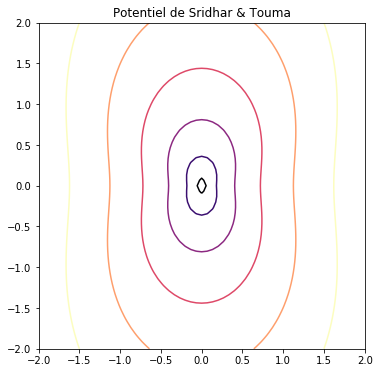

In [6]:
ax = plot_isopotentiels(potentiel_ST)
ax.set(title="Potentiel de Sridhar & Touma", aspect='equal')
ax.figure.set_size_inches((8, 6))

## Intégration numérique des orbites

In [7]:
import scipy.integrate as SI

def zdot_ST(z, t):
    """
    z = (r, theta, rdot, thetadot) pour le potentiel de ST(alpha=0.5).
    """
    
    alpha = 0.5
    r, theta, rdot, thetadot = z
    
    rdotdot = r * thetadot**2 - dpST_dr(r, theta, alpha=alpha)
    thetadotdot = -2/r * rdot * thetadot - r**-2 * dpST_dtheta(r, theta, alpha=alpha)
    
    # zdot = (rdot, thetadot, rdotdot, thetadotdot)
    return (rdot, thetadot, rdotdot, thetadotdot)

In [8]:
def temps_caract(potentiel, r0, theta0):
    """
    Temps caractéristique.
    """
    
    return 2 * N.pi * r0 / potentiel(r0, theta0) ** 0.5

In [9]:
def energie(zs, potentiel):
    """
    Énergie totale = potentiel(r, theta) + 0.5 * (rp**2 + (r*thetap)**2)
    """
    
    if N.ndim(zs) == 2:
        rs, thetas, rdots, thetadots = zs.T
    else:
        rs, thetas, rdots, thetadots = zs 
        
    kin = 0.5 * (rdots**2 + (rs * thetadots)**2)
    pot = potentiel(rs, thetas)
    
    return kin + pot

### Orbite sans vitesse initiale

In [10]:
r0, theta0, rdot0, thetadot0 = z0 = (1, N.pi/5, 0, 0)  # Conditions initiales
tc = temps_caract(potentiel_ST, r0, theta0)
E0 = energie(z0, potentiel_ST)

print("Conditions initiales:", z0)
print("Temps caractéristique:", tc)
print("Énergie initiale:", E0)

Conditions initiales: (1, 0.6283185307179586, 0, 0)
Temps caractéristique: 3.96071923264
Énergie initiale: 2.51658510752


In [11]:
ntc = 25       # Nb de temps caractéristiques
npts = 1000    # Nb de points
t = N.linspace(0, ntc * tc, npts)
zs = SI.odeint(zdot_ST, z0, t)

In [12]:
rs, thetas, rdots, thetadots = zs.T
xs = rs * N.cos(thetas)
ys = rs * N.sin(thetas)

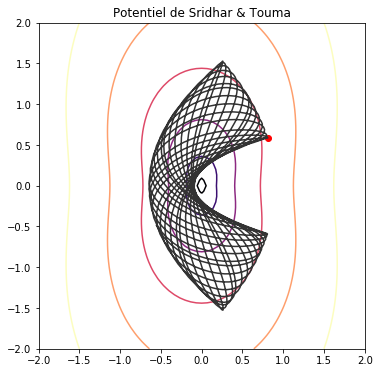

In [13]:
ax = plot_isopotentiels(potentiel_ST)
ax.scatter([xs[0]], [ys[0]], marker='o', color='r')  # Position initiale
ax.plot(xs, ys, color='0.2')
ax.set(title="Potentiel de Sridhar & Touma", aspect='equal')
ax.figure.set_size_inches((8, 6))

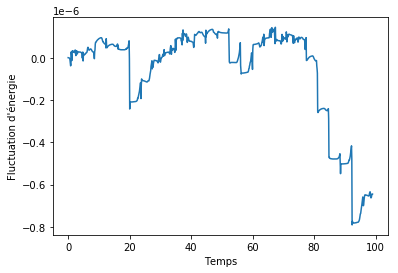

In [14]:
es = energie(zs, potentiel_ST)
E0 = es[0]

fig, ax = P.subplots()
ax.plot(t, es/E0 - 1)
ax.set(xlabel='Temps', ylabel=u"Fluctuation d'énergie")
ax.ticklabel_format(style='sci', scilimits=(-3, 3), axis='y');